# **Part A**

In [54]:
from sklearn.datasets import load_iris
from sklearn import datasets

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import classification_report, confusion_matrix , accuracy_score


from sklearn.metrics import accuracy_score, f1_score
from sklearn.inspection import DecisionBoundaryDisplay
import imageio

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Dataset's Information**

In [2]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris = load_iris()

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
import pandas as pd

iris_data = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_label = iris.target

iris_data['target'] = iris.target

In [ ]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris_data.shape

(150, 5)

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

## **Correlation Matrix**

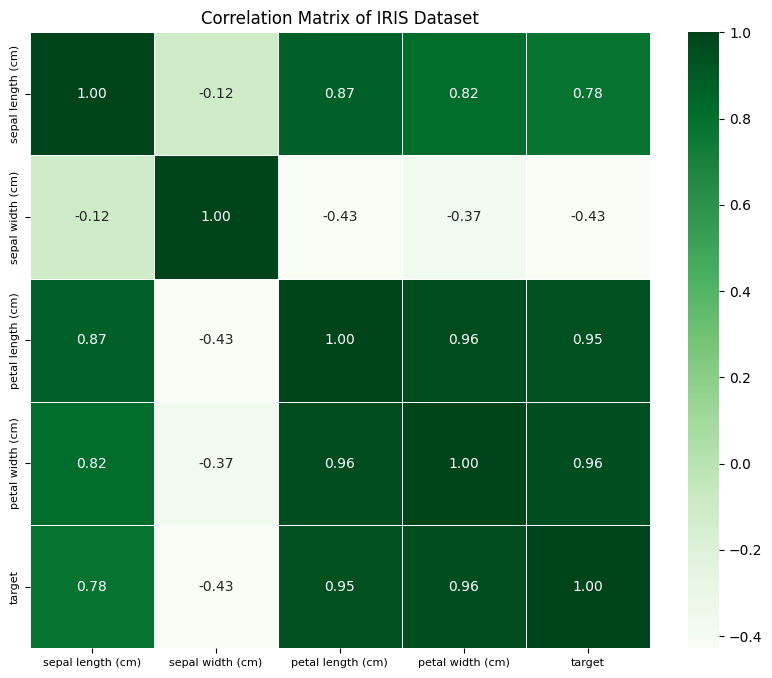

In [ ]:
import pandas as pd
import seaborn as sns            #Python data visualization library based on Matplotlib (for heatmap)
import numpy as np
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = iris_data.corr()

# Create heatmap using seaborn
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', linewidths=0.5, annot_kws={"size": 10}, fmt='.2f', yticklabels=corr_matrix.columns)
#coolwarm,viridis,plasma,inferno,cividis,Blues,Reds,Greens,cubehelix,magma

# Adjust font size of annotations
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Show Correlation matrix :
plt.title("Correlation Matrix of IRIS Dataset")
plt.show()

## **Mean & Variance**

Class Statistics:
 target                         0         1         2
sepal length (cm) mean  5.006000  5.936000  6.588000
                  var   0.124249  0.266433  0.404343
sepal width (cm)  mean  3.428000  2.770000  2.974000
                  var   0.143690  0.098469  0.104004
petal length (cm) mean  1.462000  4.260000  5.552000
                  var   0.030159  0.220816  0.304588
petal width (cm)  mean  0.246000  1.326000  2.026000
                  var   0.011106  0.039106  0.075433


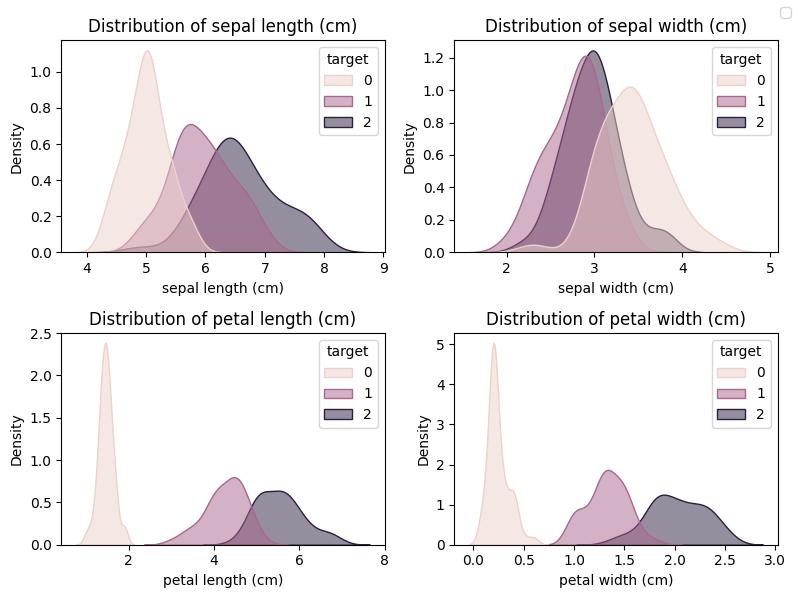

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mean & Variance foe each feature in each class
class_stats = iris_data.groupby('target').agg(['mean', 'var']).transpose()

print("Class Statistics:\n", class_stats)

fig, axes = plt.subplots(2, 2, figsize=(8,6))
axes = axes.ravel()

for idx, feature in enumerate(iris.feature_names):
    sns.kdeplot(data=iris_data, x=feature, hue='target', fill=True, common_norm=False, alpha=0.5, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Density')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, iris.target_names, loc='upper right')

plt.tight_layout()
plt.show()

## **Dataset Plotting**

### **Histogram Plotting**

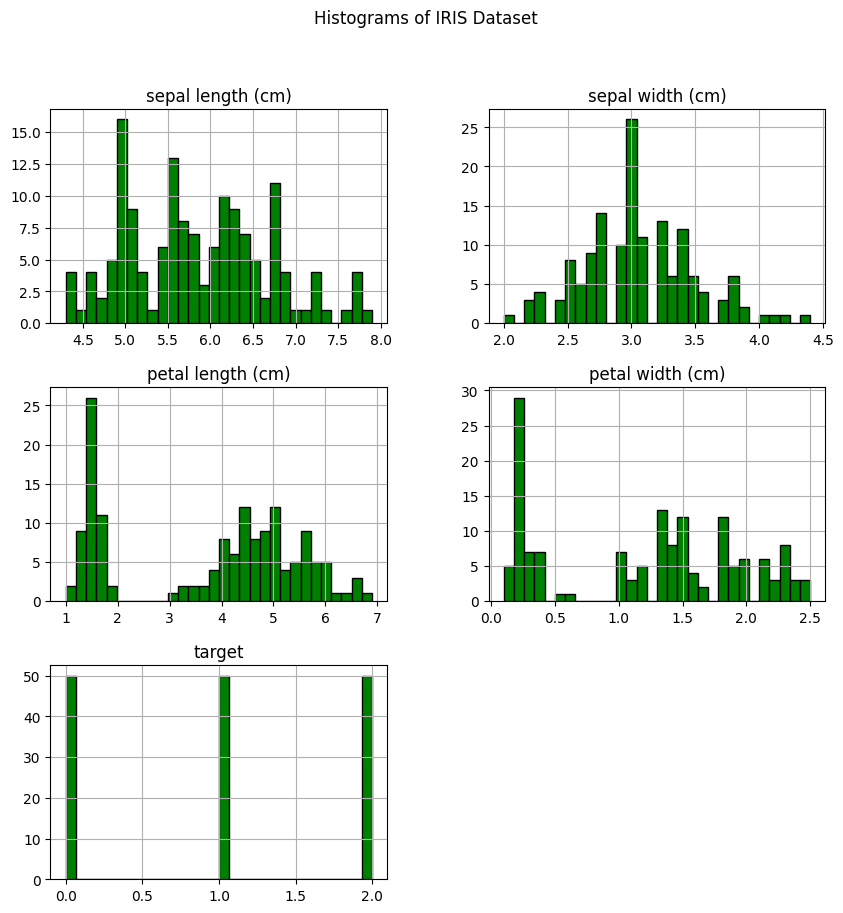

In [ ]:
from matplotlib import pyplot as plt

iris_data.hist(bins=30, figsize=(10,10), color = 'green' , edgecolor='black')
plt.suptitle('Histograms of IRIS Dataset')
plt.show()

**Histogram by dividing Classes**

<function matplotlib.pyplot.show(close=None, block=None)>

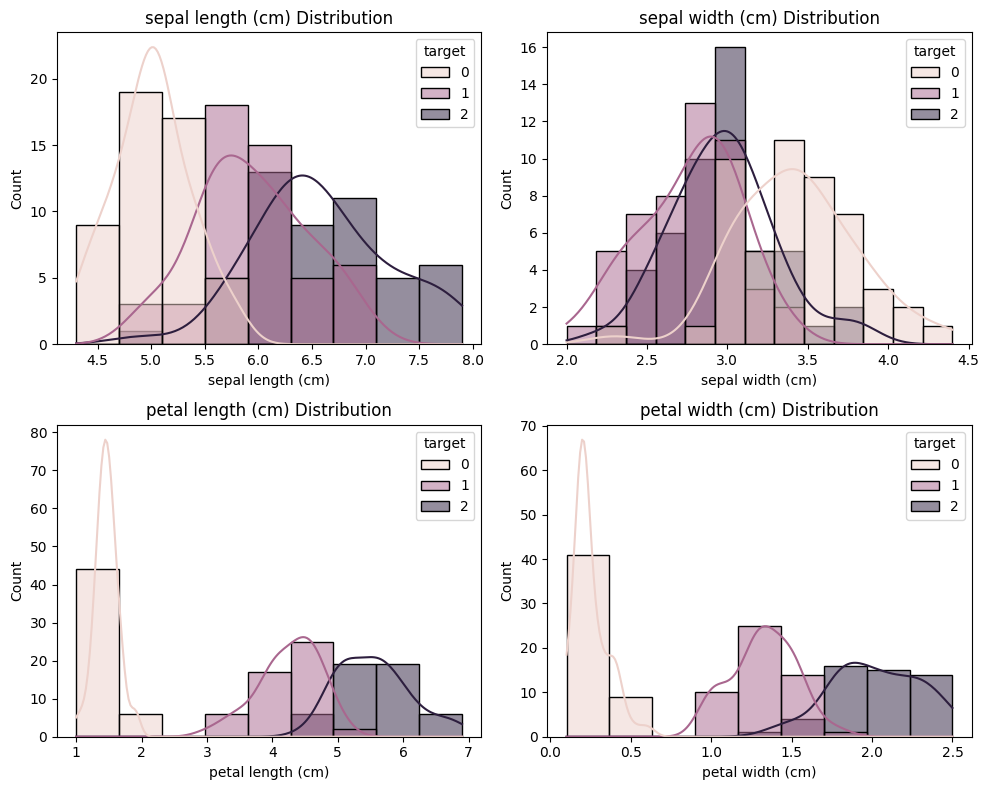

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Column_names = iris_data.columns
Column_names = Column_names.to_list()

plt.figure(figsize=(10,8))
for i, feature in enumerate(Column_names[:-1]):
  plt.subplot(2,2,i+1)
  sns.histplot(data=iris_data , x=feature , hue='target' , kde=True)
  plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show

### **3D & 2D PLot**

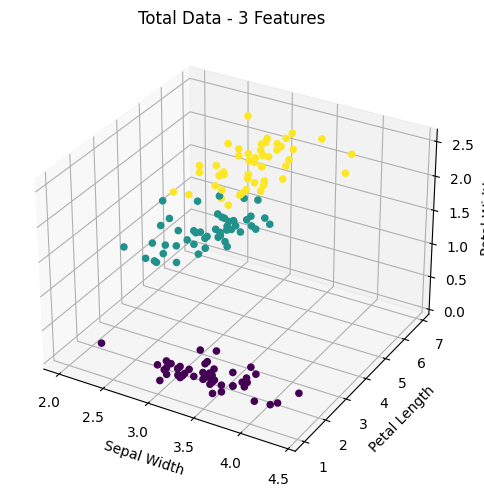

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

# Plot the data with a different colormap
x = iris.data[:, 1]
y = iris.data[:, 2]
z = iris.data[:, 3]

# Plot the data with a different colormap
#'viridis', 'jet', 'rainbow', and 'cividis'
ax.scatter(x, y, z, c=iris_label, cmap='viridis', alpha=1)

# Set the labels for the axes
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')
plt.title('Total Data - 3 Features ')

# Show the plot
plt.tight_layout()
plt.show()

**PairPlot**

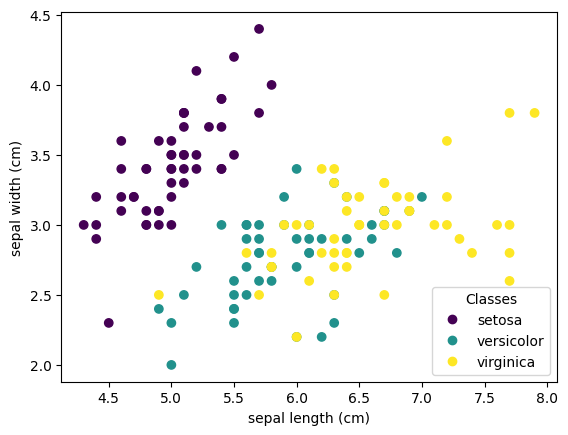

In [ ]:
# Form 1
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

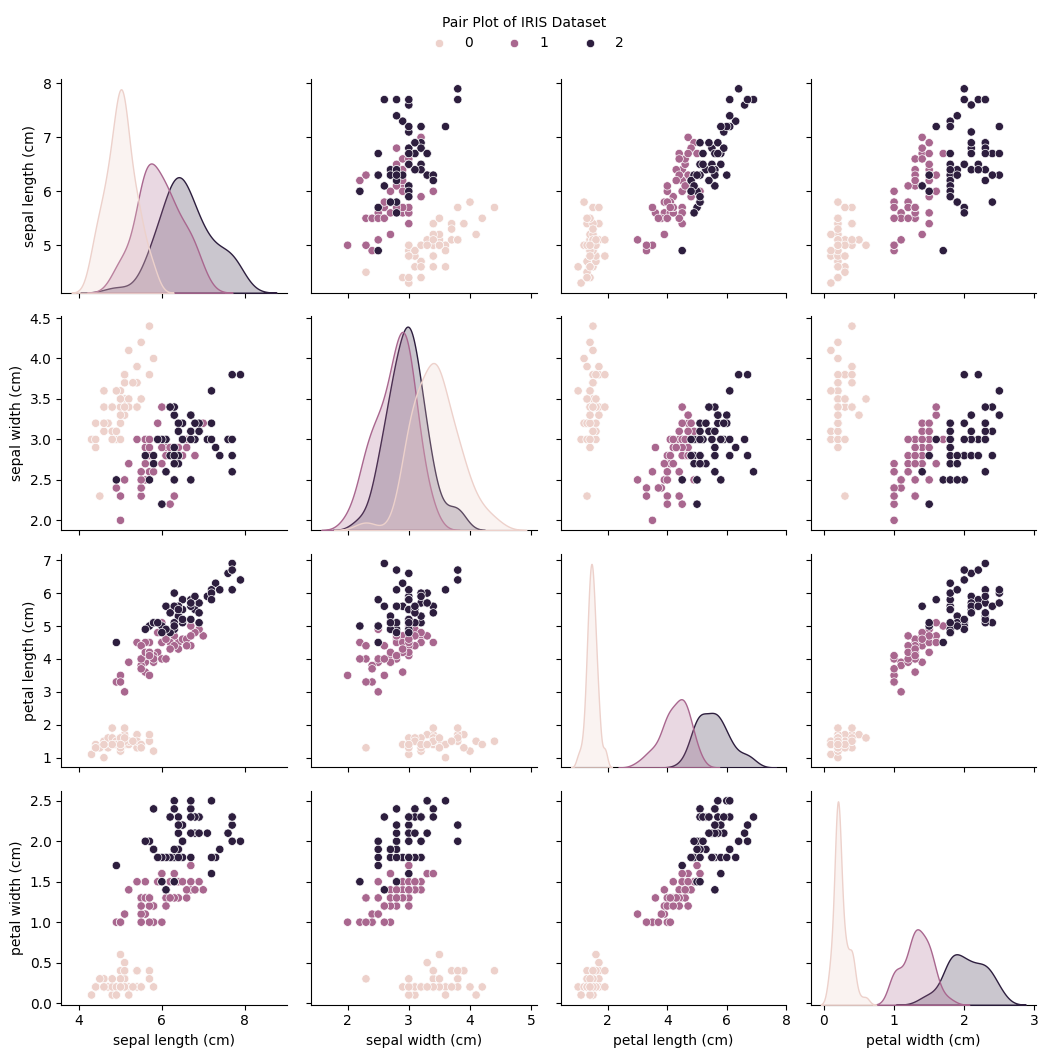

In [ ]:
# Form 2
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.pairplot(iris_data , hue = 'target')
sns.move_legend(
    ax , 'lower center',
    bbox_to_anchor=(.5,1) , ncol=3 , title = 'Pair Plot of IRIS Dataset', frameon=False)

plt.tight_layout()

ax.fig.savefig('pairplot_iris.jpg', dpi=300, format='jpg')

plt.show()

### **t-SNE & Plot**

**t_SNE**

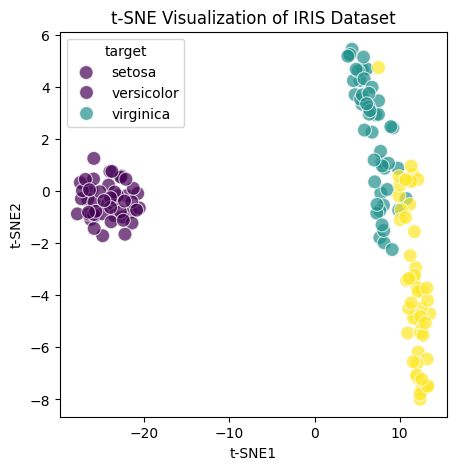

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=24)
iris_tsne = tsne.fit_transform(iris.data)

iris_tsne_df = pd.DataFrame(data=iris_tsne, columns=['t-SNE1', 't-SNE2'])
iris_tsne_df['target'] = iris.target

plt.figure(figsize=(5,5))
sns.scatterplot(data=iris_tsne_df, x='t-SNE1', y='t-SNE2', hue='target', palette='viridis', s=100, alpha=0.7)
plt.title('t-SNE Visualization of IRIS Dataset')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend(title='target', labels=iris.target_names)
plt.show()

In [ ]:
iris_tsne_df.shape

(150, 3)

In [ ]:
iris_tsne_df.head()

,t-SNE1,t-SNE2,target
0,-23.580931,-0.522060,0
1,-26.291704,-1.093696,0
2,-26.193335,0.053057,0
3,-26.638256,-0.321696,0
4,-23.545013,-0.941377,0


# **Part B**

## **Data Splitting**

In [38]:
from sklearn.model_selection import train_test_split

X = iris_data.iloc[:,:4]
Y = iris_data['target']

# Split the data to Train & Test data
x_train , x_test ,y_train , y_test = train_test_split(X, Y, test_size=0.3, random_state=24)

print('x_train : ',x_train.shape)
print('y_train : ',y_train.shape)
print('x_test : ',x_test.shape)
print('y_test : ',y_test.shape)

x_train :  (105, 4)
y_train :  (105,)
x_test :  (45, 4)
y_test :  (45,)


## **Linear SVM**

### **Normalizing & PCA**

Size of Data after PCA: (150, 2)

Explained Variance: [0.72962445 0.22850762]


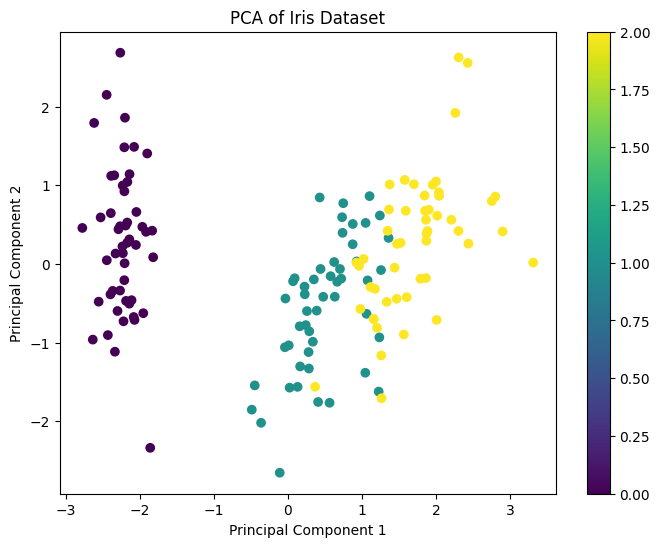

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ِData Normalizing
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Dimension Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# تبدیل نتایج PCA به DataFrame
iris_data_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
iris_data_pca['target'] = Y

print("Size of Data after PCA:", X_pca.shape)

# چاپ نسبت واریانس توضیح داده شده توسط اجزای اصلی
print("\nExplained Variance:", pca.explained_variance_ratio_)

# رسم نمودار PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar()
plt.show()


In [40]:
# Split the data to Train & Test data
x_train_pca , x_test_pca ,y_train_pca , y_test_pca = train_test_split(X_pca, Y, test_size=0.3, random_state=24)

print('x_train_pca : ',x_train_pca.shape)
print('y_train_pca : ',y_train_pca.shape)
print('x_test_pca : ',x_test_pca.shape)
print('y_test_pca : ',y_test_pca.shape)

x_train_pca :  (105, 2)
y_train_pca :  (105,)
x_test_pca :  (45, 2)
y_test_pca :  (45,)


### **LDA**

size of Data after LDA : (150, 2)


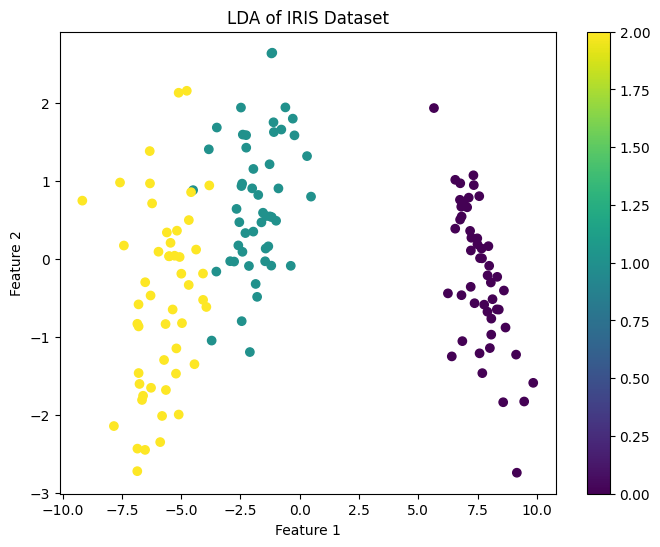

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

from sklearn.preprocessing import MinMaxScaler

# Apply LDA to the data
lda= LinearDiscriminantAnalysis(n_components=2)
X_lda=lda.fit_transform(X , Y)

print("size of Data after LDA :", X_lda.shape)

# Data Plot
plt.figure(figsize=(8,6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=Y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LDA of IRIS Dataset')
plt.colorbar()
plt.show()


In [42]:
# Split the data to Train & Test data
x_train_lda , x_test_lda ,y_train_lda , y_test_lda = train_test_split(X_lda, Y, test_size=0.3, random_state=24)

print('x_train_lda : ',x_train_lda.shape)
print('y_train_lda : ',y_train_lda.shape)
print('x_test_lda : ',x_test_lda.shape)
print('y_test_lda : ',y_test_lda.shape)

x_train_lda :  (105, 2)
y_train_lda :  (105,)
x_test_lda :  (45, 2)
y_test_lda :  (45,)


### **LinearSVC**

In [43]:
from sklearn.svm import LinearSVC, SVC

In [75]:
model = LinearSVC(loss='hinge', C=1.2, max_iter=2000)
model.fit(X_pca,Y)

LinearSVC(C=1.2, loss='hinge', max_iter=2000)

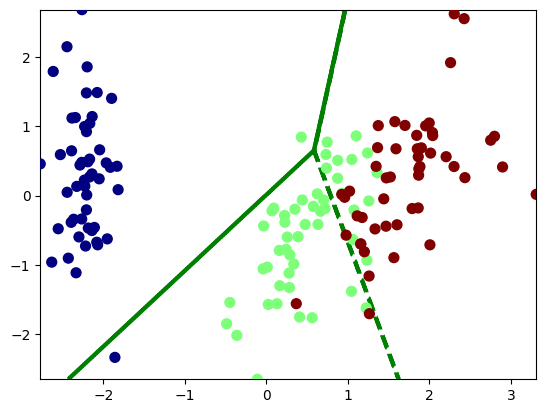

In [76]:
n = 1000
xmin, xmax = X_pca.min(0), X_pca.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.predict(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='jet', s=50, zorder=3)

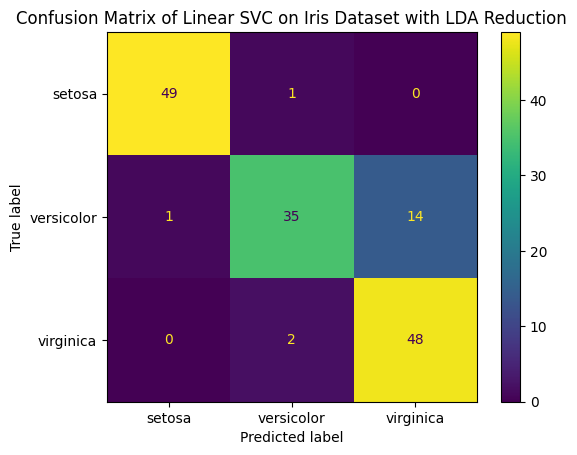

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

# پیش‌بینی مقادیر برای داده‌های اصلی
y_pred = model.predict(X_pca)

# نمایش ماتریس Confusion
cm = confusion_matrix(Y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.viridis)
plt.title('Confusion Matrix of Linear SVC on Iris Dataset with LDA Reduction')
plt.show()

## **SVC**

In [72]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

model = SVC(C=1., kernel='linear', probability=True)
model.fit(X_pca, Y)

SVC(kernel='linear', probability=True)

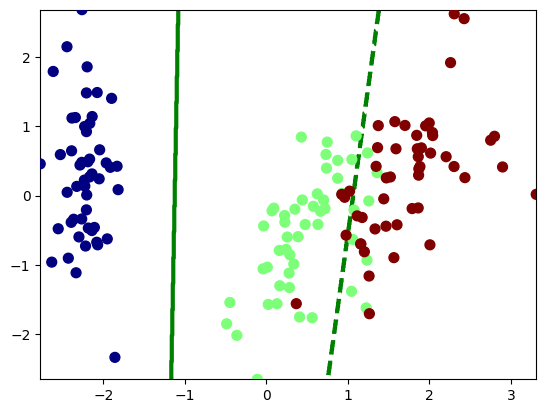

In [73]:
n = 1000
xmin, xmax = X_pca.min(0), X_pca.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.predict(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='jet', s=50, zorder=3)

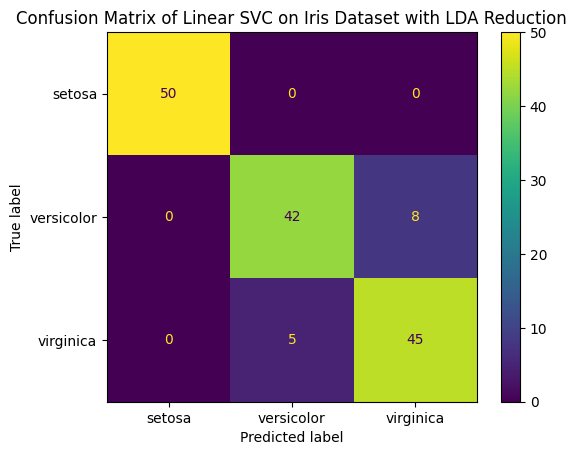

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

# پیش‌بینی مقادیر برای داده‌های اصلی
y_pred = model.predict(X_pca)

# نمایش ماتریس Confusion
cm = confusion_matrix(Y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.viridis)
plt.title('Confusion Matrix of Linear SVC on Iris Dataset with LDA Reduction')
plt.show()

In [60]:
print('weights : ',model.coef_[0] , 'bias : ',model.intercept_[0])

weights :  [-1.43048457  0.02329253] bias :  -1.6038549933894923


In [61]:
model.support_

array([ 23,  41,  50,  52,  54,  57,  58,  62,  63,  65,  68,  70,  72,
        74,  75,  76,  77,  78,  83,  86,  87,  98, 101, 103, 106, 110,
       113, 116, 121, 123, 126, 127, 133, 134, 137, 138, 142, 148, 149],
      dtype=int32)

In [62]:
model.n_support_

array([ 2, 20, 17], dtype=int32)

In [63]:
model.support_vectors_

array([[-1.81866953,  0.08555853],
       [-1.85812246, -2.33741516],
       [ 1.10178118,  0.86297242],
       [ 1.24097932,  0.61629765],
       [ 1.0754747 , -0.20842105],
       [-0.48732274, -1.85242909],
       [ 0.92790164,  0.03222608],
       [ 0.56210831, -1.76472438],
       [ 0.71956189, -0.18622461],
       [ 0.87540719,  0.50906396],
       [ 1.22509363, -1.6222438 ],
       [ 0.73768265,  0.39657156],
       [ 1.2341781 , -0.93332573],
       [ 0.70266118, -0.06341182],
       [ 0.87427365,  0.25079339],
       [ 1.25650912, -0.07725602],
       [ 1.35840512,  0.33131168],
       [ 0.66480037, -0.22592785],
       [ 1.06109461, -0.63384324],
       [ 1.04872805,  0.5220518 ],
       [ 1.04453138, -1.38298872],
       [-0.44766702, -1.54379203],
       [ 1.15788161, -0.69886986],
       [ 1.44015066, -0.04698759],
       [ 0.36701769, -1.56150289],
       [ 1.36417549,  0.69275645],
       [ 1.2601151 , -1.16226042],
       [ 1.47143146,  0.25562182],
       [ 0.97798073,

In [64]:
model.dual_coef_

array([[ 0.2257028 ,  0.82292652, -0.        , -0.        , -0.        ,
        -1.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.04862933, -0.        , -0.        , -0.40864011,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        ],
       [ 0.13685134,  0.27178876,  1.        ,  1.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  0.12592737,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  0.85611031,  1.        ,  1.        ,
         1.        ,  0.        , -1.        , -0.98203768, -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.

## **SGDClassifier**

In [81]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, tol=0.0001, random_state=24)
model.fit(X_pca, Y)

SGDClassifier(alpha=0.001, random_state=24, tol=0.0001)

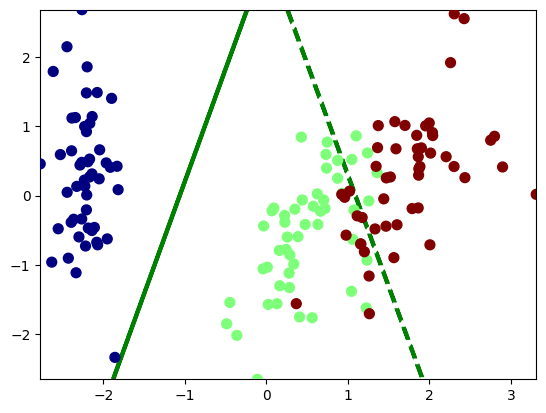

In [82]:
n = 1000
xmin, xmax = X_pca.min(0), X_pca.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model.predict(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='jet', s=50, zorder=3)

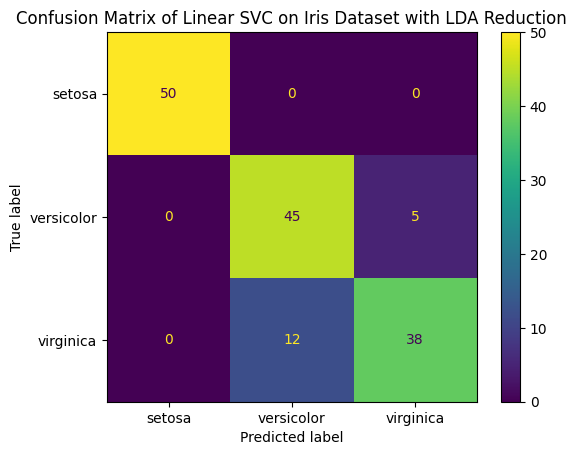

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

# پیش‌بینی مقادیر برای داده‌های اصلی
y_pred = model.predict(X_pca)

# نمایش ماتریس Confusion
cm = confusion_matrix(Y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.viridis)
plt.title('Confusion Matrix of Linear SVC on Iris Dataset with LDA Reduction')
plt.show()

# **Part C**

## **Polynomial SVM**

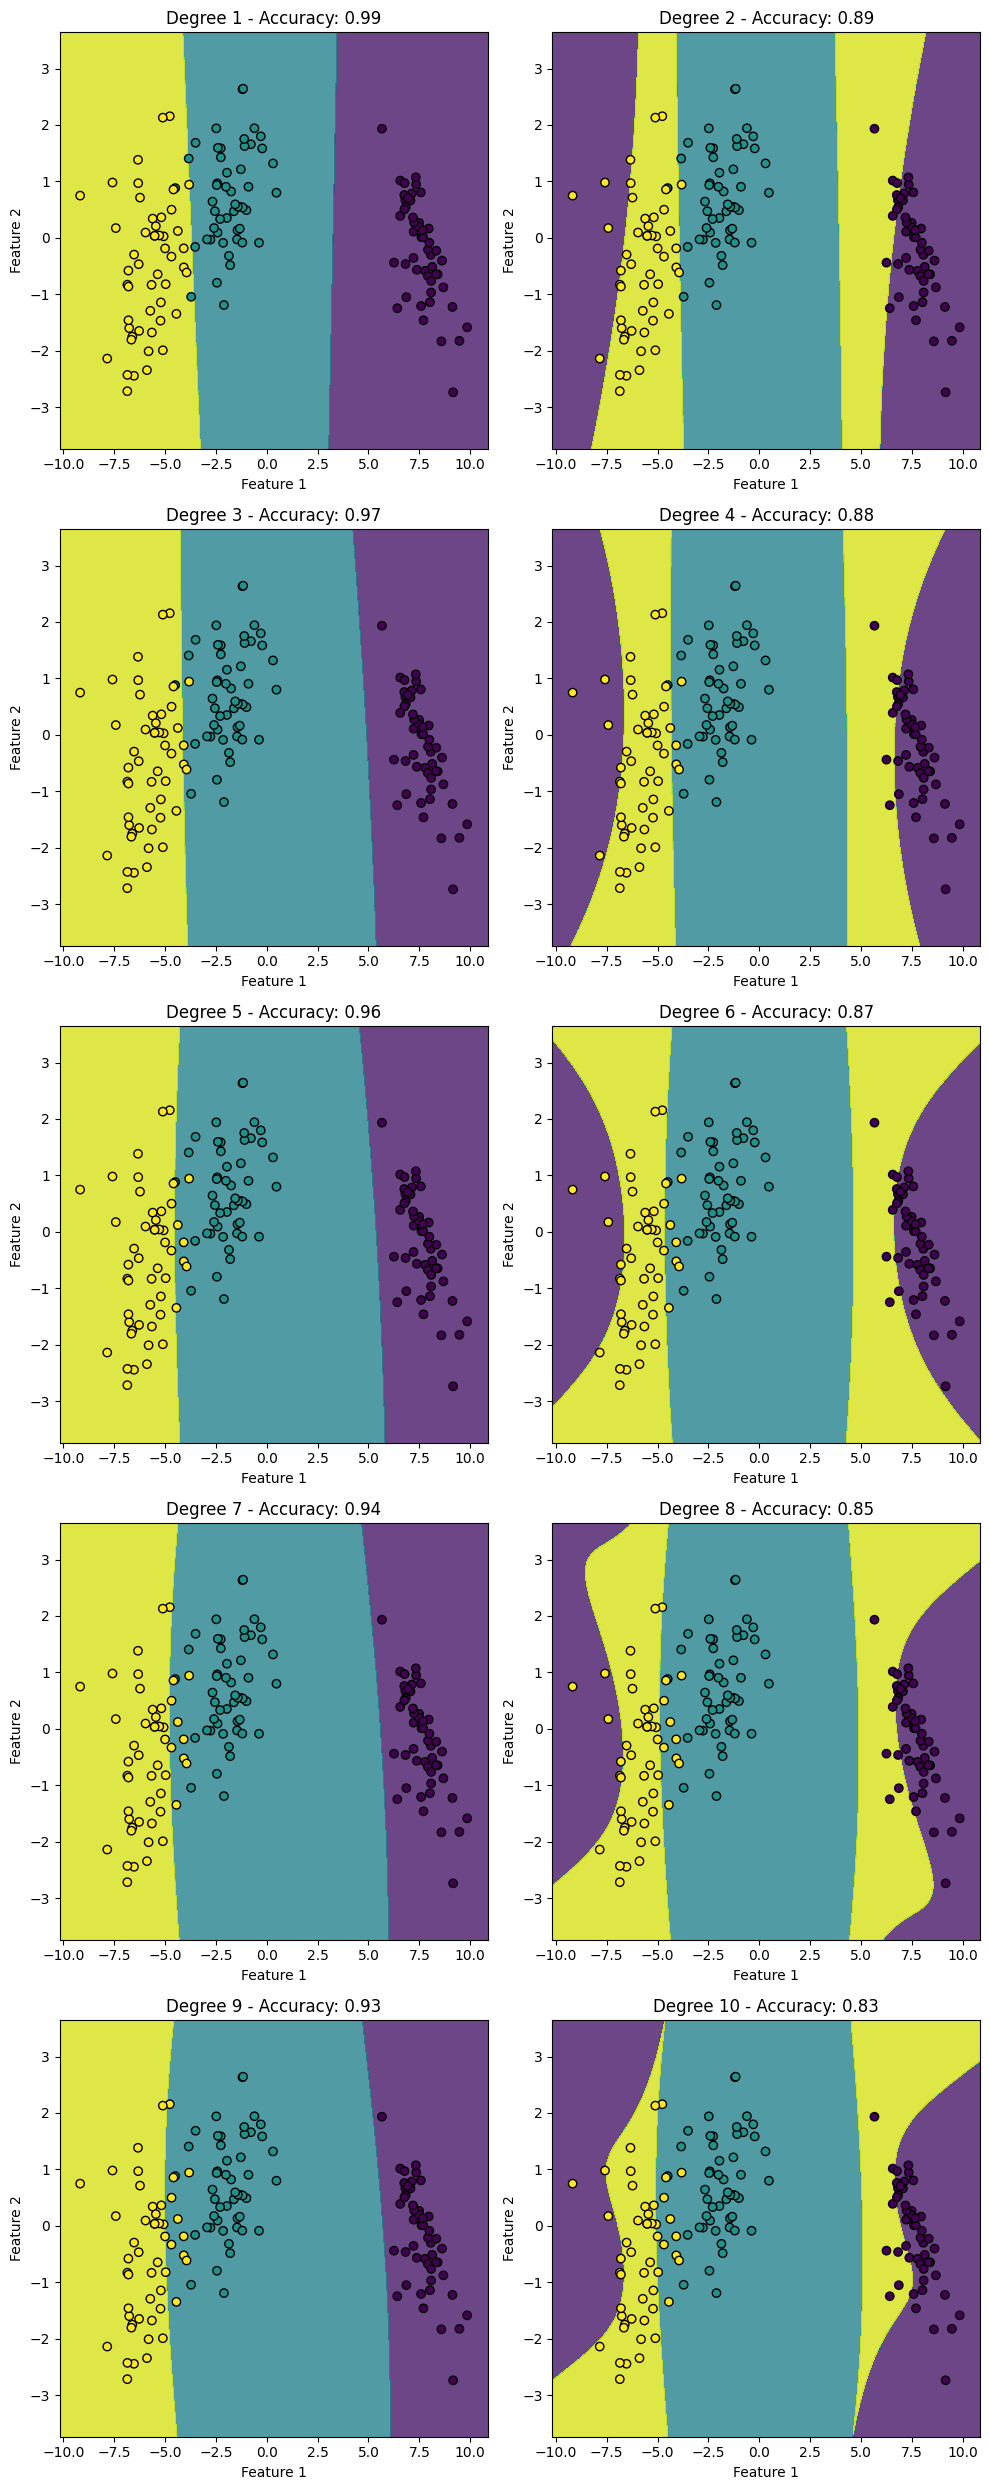

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

def plot_decision_boundaries_subplots(X, y):
    degrees = [1,2,3,4,5,6,7,8,9,10]
    models = [SVC(kernel='poly', degree=degree, C=1.0) for degree in degrees]

    fig, axes = plt.subplots(5,2, figsize=(10,25))
    axes = axes.flatten()

    for ax, model, degree in zip(axes, models, degrees):
        model.fit(X, y)
        y_pred = model.predict(X)
        accuracy = accuracy_score(y, y_pred)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.8)
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
        ax.set_title(f'Degree {degree} - Accuracy: {accuracy:.2f}')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')

    plt.tight_layout()
    fig.savefig('PloySVM_iris.jpg', dpi=300, format='jpg')
    plt.show()

# Polynomial SVM
plot_decision_boundaries_subplots(X_lda, Y)


## **imageio & GIF**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import imageio
from sklearn.svm import SVC

def create_gif(images, gif_path):
    with imageio.get_writer(gif_path, mode='I', duration=0.5) as writer:
        for image in images:
            writer.append_data(imageio.imread(image))


def plot_decision_boundaries_and_save_images(X, y):
    degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    models = [SVC(kernel='poly', degree=degree, C=1.0) for degree in degrees]
    images = []

    for degree, model in zip(degrees, models):
        model.fit(X, y)
        y_pred = model.predict(X)
        accuracy = accuracy_score(y, y_pred)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(10, 8))
        plt.contourf(xx, yy, Z, alpha=0.8)
        scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
        plt.title(f'Degree {degree} - Accuracy: {accuracy:.2f}')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')

        image_path = f'SVM_degree_{degree}.png'
        plt.savefig(image_path, dpi=300, format='png')
        images.append(image_path)
        plt.close()

    gif_path = 'PolySVM_iris.gif'
    create_gif(images, gif_path)
    return gif_path


# ایجاد و ذخیره GIF
gif_path = plot_decision_boundaries_and_save_images(X_pca, Y)
print(f'GIF created and saved at {gif_path}')


<ipython-input-128-dadc72ffbc15>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  writer.append_data(imageio.imread(image))


GIF created and saved at PolySVM_iris.gif


# **Part D**

## **SVM from Scratch**

In [ ]:
import numpy as np
import cvxopt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

class SVM:
    def __init__(self, C=1.0):
        self.C = C
        self.w = None
        self.b = 0
        self.a = None
        self.sv_x = None
        self.sv_y = None

    @staticmethod
    def polynomial_kernel(X, Y, r=2, degree=3):
        return (r + np.dot(X, Y.T)) ** degree

    def fit(self, X, y, kernel_type='polynomial_kernel', poly_params=(1, 3)):
        n_samples, n_features = X.shape

        # Compute the Gram matrix
        if kernel_type == 'polynomial_kernel':
            K = self.polynomial_kernel(X, X, poly_params[0], poly_params[1])
        else:
            raise ValueError("Invalid kernel type")

        # Construct P, q, A, b, G, h matrices for CVXOPT
        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1, n_samples), 'd')
        b = cvxopt.matrix(0.0)
        G = cvxopt.matrix(np.vstack((np.diag(np.ones(n_samples) * -1), np.identity(n_samples))))
        h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * self.C)))

        # Solve QP problem
        cvxopt.solvers.options['show_progress'] = False
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        self.a = np.ravel(solution['x'])

        # Support vectors have non-zero Lagrange multipliers
        sv = self.a > 1e-5
        self.a = self.a[sv]
        self.sv_x = X[sv]
        self.sv_y = y[sv]

        # Bias
        if len(self.a) > 0:
            K_sv = K[sv][:, sv]
            self.b = np.mean(self.sv_y - np.dot((self.a * self.sv_y), K_sv))
        else:
            self.b = 0

        self.w = None  # Not used for non-linear kernels

    def predict(self, X_t, kernel_type='polynomial_kernel', poly_params=(1, 3)):
        if kernel_type == 'polynomial_kernel':
            K = self.polynomial_kernel(X_t, self.sv_x, poly_params[0], poly_params[1])
        else:
            raise ValueError("Invalid kernel type")

        y_predict = np.dot(K, self.a * self.sv_y) + self.b
        return np.sign(y_predict)

# One-vs-Rest strategy for multi-class classification
class OvR_SVM:
    def __init__(self, C=1.0):
        self.C = C
        self.models = []

    def fit(self, X, y, kernel_type='polynomial_kernel', poly_params=(1, 3)):
        self.classes = np.unique(y)
        for cls in self.classes:
            y_binary = np.where(y == cls, 1, -1)
            model = SVM(C=self.C)
            model.fit(X, y_binary, kernel_type=kernel_type, poly_params=poly_params)
            self.models.append(model)

    def predict(self, X, kernel_type='polynomial_kernel', poly_params=(1, 3)):
        predictions = np.zeros((X.shape[0], len(self.classes)))
        for i, model in enumerate(self.models):
            predictions[:, i] = model.predict(X, kernel_type=kernel_type, poly_params=poly_params)
        return self.classes[np.argmax(predictions, axis=1)]

Degree 1: Accuracy = 0.7556, F1 Score = 0.7305
Degree 2: Accuracy = 0.9333, F1 Score = 0.9295
Degree 3: Accuracy = 0.9333, F1 Score = 0.9295
Degree 4: Accuracy = 0.9333, F1 Score = 0.9295
Degree 5: Accuracy = 0.9556, F1 Score = 0.9522
Degree 6: Accuracy = 0.9111, F1 Score = 0.9118
Degree 7: Accuracy = 0.8222, F1 Score = 0.7775
Degree 8: Accuracy = 0.7556, F1 Score = 0.7554
Degree 9: Accuracy = 0.5333, F1 Score = 0.4248
Degree 10: Accuracy = 0.5111, F1 Score = 0.4222


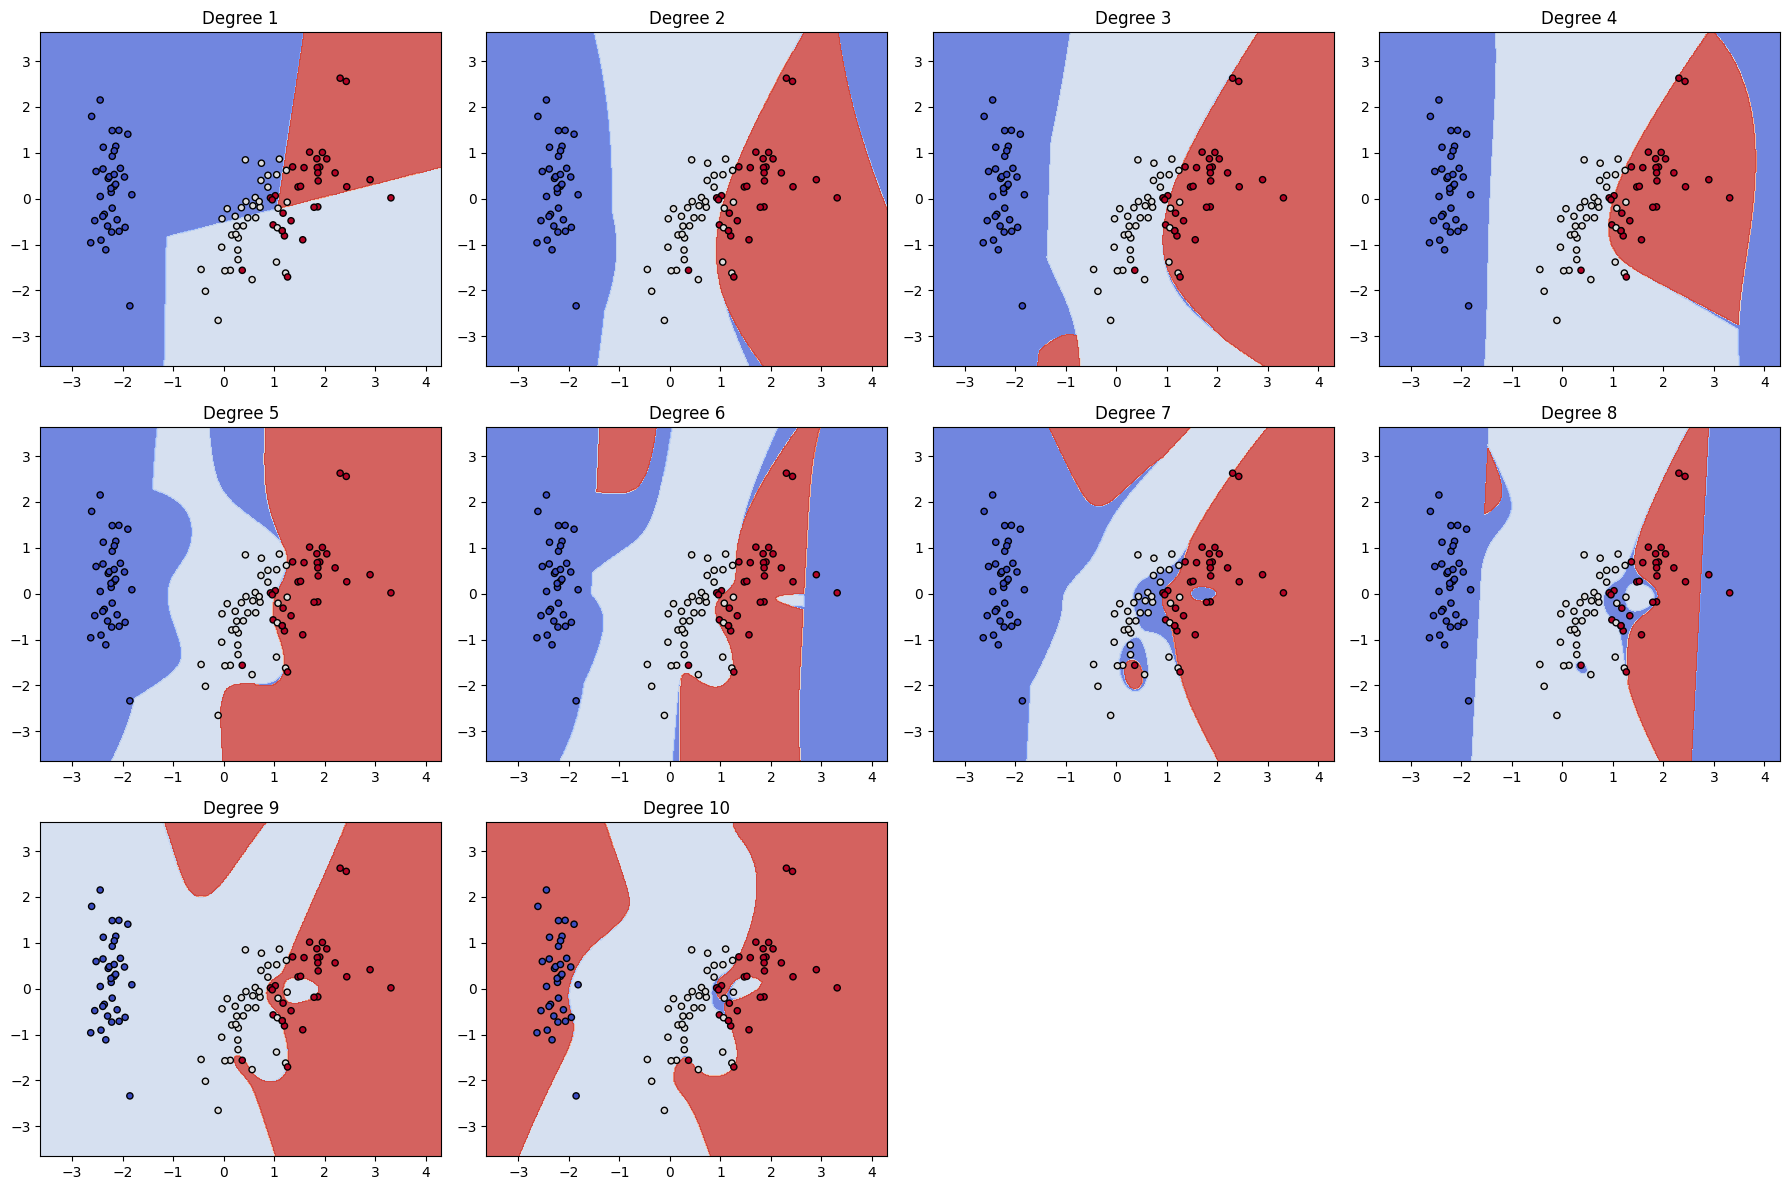

In [32]:
# Polynomial degrees to evaluate
degrees = range(1, 11)

models = []
accuracies = []
f1_scores = []

for degree in degrees:
    model = OvR_SVM(C=1)
    model.fit(x_train_pca, y_train_pca, kernel_type='polynomial_kernel', poly_params=(1, degree))
    y_pred = model.predict(x_test_pca, kernel_type='polynomial_kernel', poly_params=(1, degree))
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracies.append(accuracy)
    f1_scores.append(f1)
    models.append(model)

    print(f'Degree {degree}: Accuracy = {accuracy:.4f}, F1 Score = {f1:.4f}')

plt.figure(figsize=(18, 12))
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

for i, model in enumerate(models):
    plt.subplot(3, 4, i + 1)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], kernel_type='polynomial_kernel', poly_params=(1, degrees[i]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_pca, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    plt.title(f"Degree {i + 1}")
# Plot support vectors for SVC
    if hasattr(model, 'support_vectors_'):
        sv = model.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')


plt.tight_layout()
plt.show()


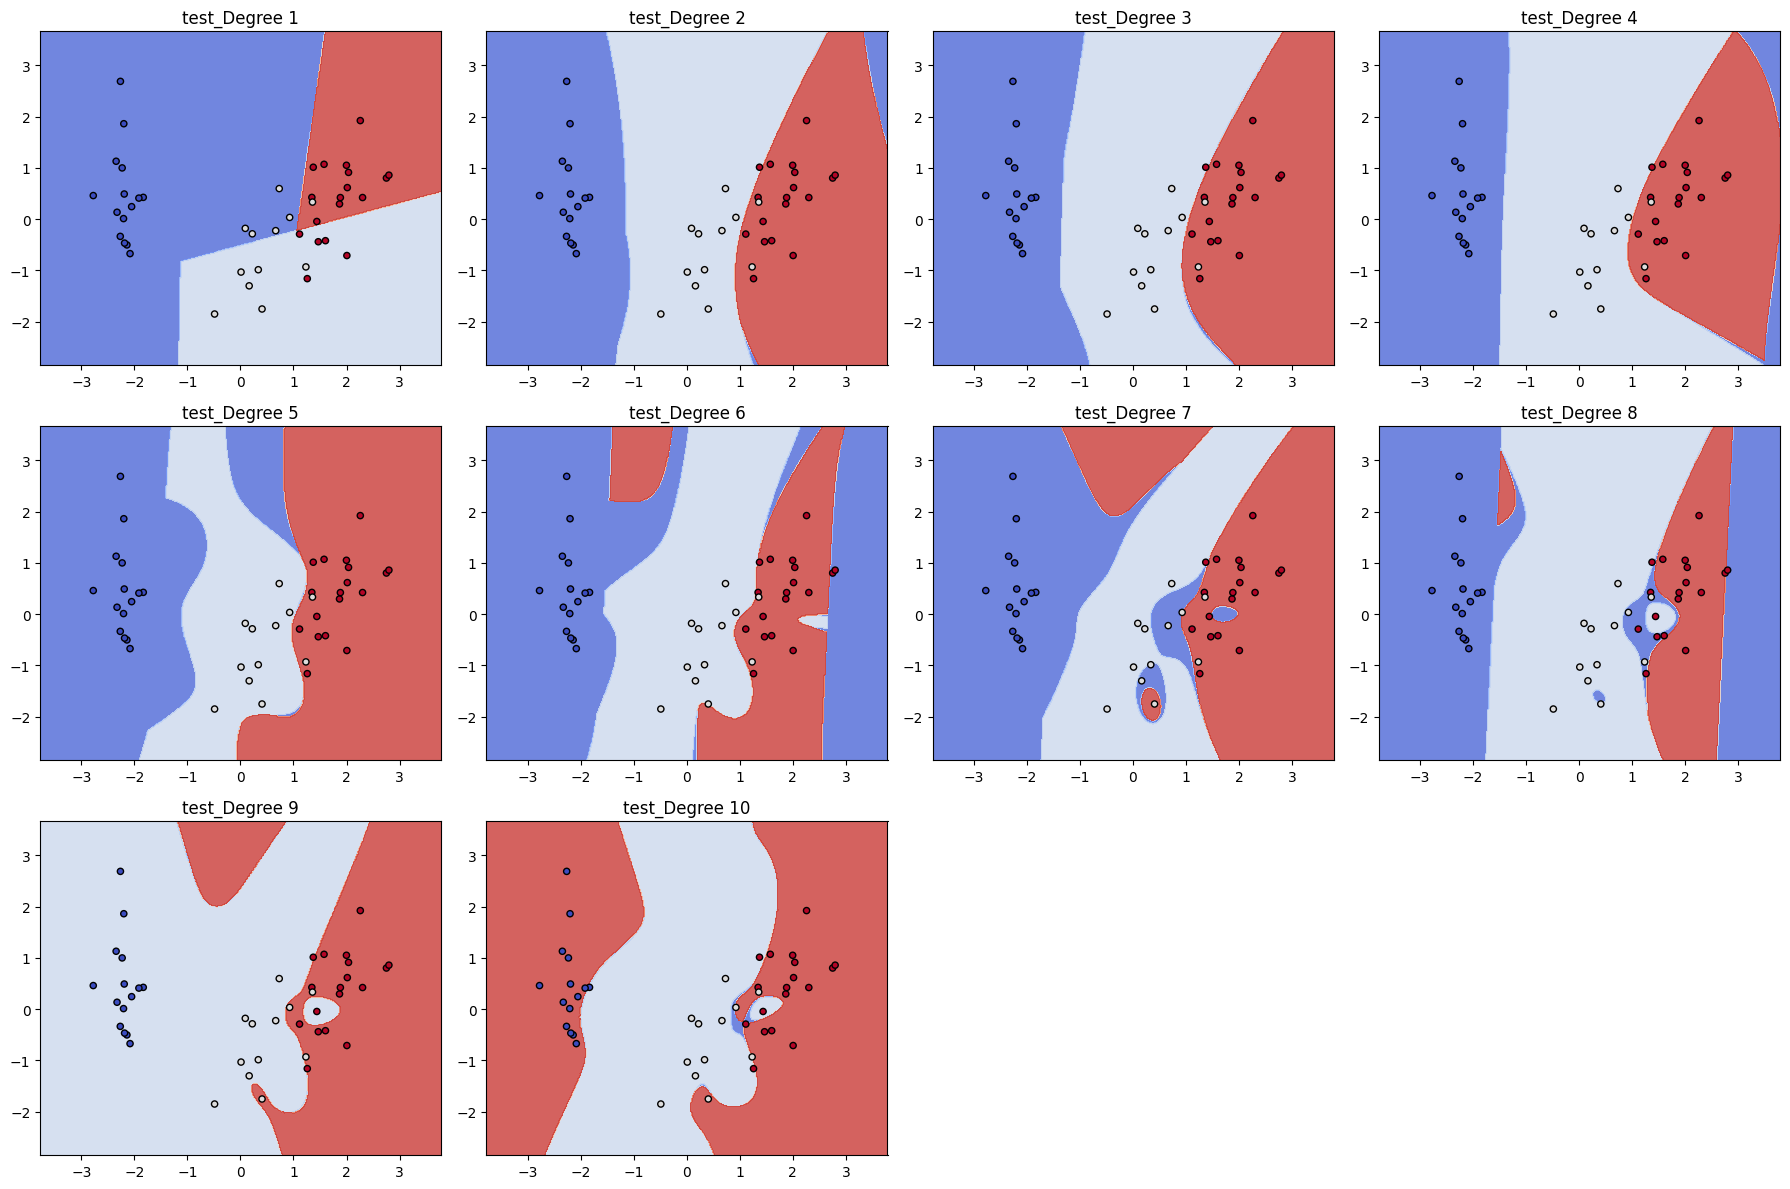

In [34]:
plt.figure(figsize=(18, 12))
x_min, x_max = x_test_pca[:, 0].min() - 1, x_test_pca[:, 0].max() + 1
y_min, y_max = x_test_pca[:, 1].min() - 1, x_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

for i, model in enumerate(models):
    plt.subplot(3, 4, i + 1)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], kernel_type='polynomial_kernel', poly_params=(1, degrees[i]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    plt.title(f"test_Degree {i + 1}")
    # Plot support vectors for SVC
    if hasattr(model, 'support_vectors_'):
        sv = model.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.tight_layout()
plt.show()

## **imageio & GIF**

In [35]:
images = []
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
for i, model in enumerate(models):
    plt.figure(figsize=(6, 4))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], kernel_type='polynomial_kernel', poly_params=(1, degrees[i]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_pca, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    plt.title(f"Degree {i + 1}")
    plt.tight_layout()
    # Save each plot as an image
    filename = f'degree_{i + 1}.png'
    plt.savefig(filename)
    images.append(imageio.imread(filename))
    plt.close()
# Save images as a GIF
gif_filename = 'Q1_D.gif'
imageio.mimsave(gif_filename, images, duration=1)
print(f"GIF created: {gif_filename}")

<ipython-input-35-2ff67fb5696e>:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


GIF created: Q1_D.gif


In [37]:
images = []
x_min, x_max = x_test_pca[:, 0].min() - 1, x_test_pca[:, 0].max() + 1
y_min, y_max = x_test_pca[:, 1].min() - 1, x_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
for i, model in enumerate(models):
    plt.figure(figsize=(6, 4))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], kernel_type='polynomial_kernel', poly_params=(1, degrees[i]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    plt.title(f"Degree {i + 1}")
    plt.tight_layout()
    # Save each plot as an image
    filename = f'test_degree_{i + 1}.png'
    plt.savefig(filename)
    images.append(imageio.imread(filename))
    plt.close()
# Save images as a GIF
gif_filename = 'Q1_D_test.gif'
imageio.mimsave(gif_filename, images, duration=1)
print(f"GIF created: {gif_filename}")

<ipython-input-37-dcec9ce3c576>:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


GIF created: Q1_D_test.gif
